In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [27]:
# 解决matplotlib中文乱码
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

# groupby中重新设定index
在groupby中添加as_index，让dataframe重新以0开始的数字设定index

In [ ]:
user_sex_df = user_info_df.groupby('ulp_base_sex', as_index=False)['user_log_acct'].agg({'ulp_base_sex_count':'count'})

# matplotlib

## 修改图像大小
需要在plt.figure()里修改，或是df.plot.pie里至用figsize改

In [9]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])

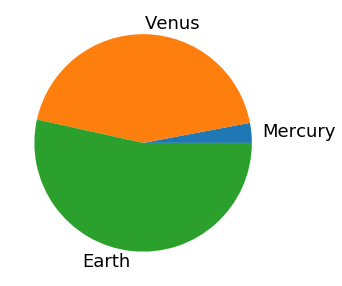

In [23]:
fig = plt.figure(figsize = (5,5))
plt.pie(df["mass"],labels = df.index,textprops={'fontsize': 18})
plt.show()

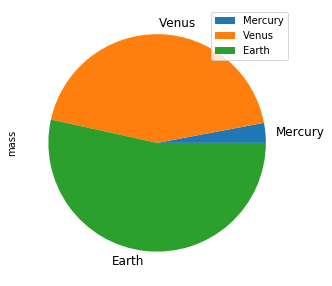

In [25]:
plot = df.plot.pie(y='mass', figsize=(5, 5),textprops={'fontsize': 12})

## 修改标题大小

Text(0.5, 1.0, '小家电消费用户的年龄分布')

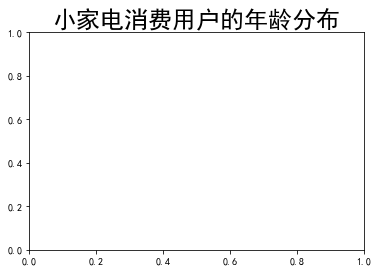

In [28]:
plt.title("小家电消费用户的年龄分布", size=24) # 图标题

## 多个柱状图

详细参阅：https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars

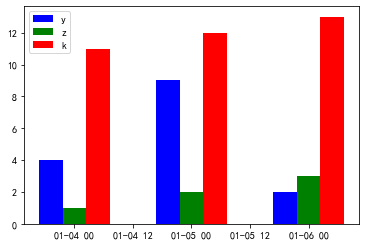

In [31]:
from matplotlib.dates import date2num
import datetime

x = [
    datetime.datetime(2011, 1, 4, 0, 0),
    datetime.datetime(2011, 1, 5, 0, 0),
    datetime.datetime(2011, 1, 6, 0, 0)
]
x = date2num(x)

y = [4, 9, 2]
z = [1, 2, 3]
k = [11, 12, 13]

ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='b', align='center')
ax.bar(x, z, width=0.2, color='g', align='center')
ax.bar(x+0.2, k, width=0.2, color='r', align='center')
ax.xaxis_date()
ax.legend(('y', 'z', 'k') )
plt.show()

### subplot

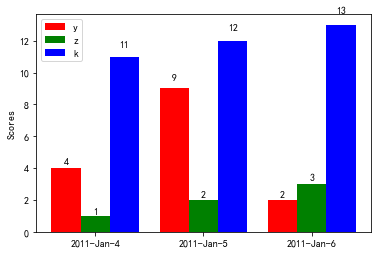

In [32]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [4, 9, 2]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [1,2,3]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [11,12,13]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2011-Jan-4', '2011-Jan-5', '2011-Jan-6') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('y', 'z', 'k') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


In [33]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

## sns.bar()

https://seaborn.pydata.org/generated/seaborn.barplot.html

### 在subplot中添加title

https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
    
使用ax.set_title()

# 关于时间处理

In [35]:
from datetime import datetime, date, time

datetime.datetime(2006, 11, 21, 16, 30)

In [36]:
# Using datetime.combine()
d = date(2005, 7, 14)
t = time(12, 30)
datetime.combine(d, t)

datetime.datetime(2005, 7, 14, 12, 30)

In [39]:
# Using datetime.now() or datetime.utcnow()
datetime.now()   

datetime.datetime(2020, 10, 5, 17, 39, 32, 704255)

In [38]:
datetime.utcnow()   

datetime.datetime(2020, 10, 5, 21, 39, 28, 284802)

In [40]:
# Using datetime.strptime()
dt = datetime.strptime("21/11/06 16:30", "%d/%m/%y %H:%M")
dt

datetime.datetime(2006, 11, 21, 16, 30)

## 计算宝宝生日

参阅：https://www.geeksforgeeks.org/python-program-to-calculate-age-in-year/

In [41]:
# Python3 code to  calculate age in years 
from datetime import date 
  
def calculateAge(born): 
    today = date.today() 
    try:  
        birthday = born.replace(year = today.year) 
  
    # raised when birth date is February 29 
    # and the current year is not a leap year 
    except ValueError:  
        birthday = born.replace(year = today.year, 
                  month = born.month + 1, day = 1) 
  
    if birthday > today: 
        return today.year - born.year - 1
    else: 
        return today.year - born.year 
          
# Driver code 
print(calculateAge(date(1997, 2, 3)), "years") 

23 years


# seaborn

## 箱线图

https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [2]:
import seaborn as sns

In [3]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=tips["total_bill"])

AttributeError: module 'seaborn' has no attribute 'set_theme'

# 把object转化成numeric

除了astype以外，还有to_numeric()

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

In [5]:
Data = {'Product': ['AAA','BBB','CCC','DDD'],
          'Price': ['250.44','ABC260','270','280XYZ']}

df = pd.DataFrame(Data)

print (df)
print(df.dtypes)

  Product   Price
0     AAA  250.44
1     BBB  ABC260
2     CCC     270
3     DDD  280XYZ
Product    object
Price      object
dtype: object


In [6]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [7]:
print (df)
print(df.dtypes)

  Product   Price
0     AAA  250.44
1     BBB     NaN
2     CCC  270.00
3     DDD     NaN
Product     object
Price      float64
dtype: object
